Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (6).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


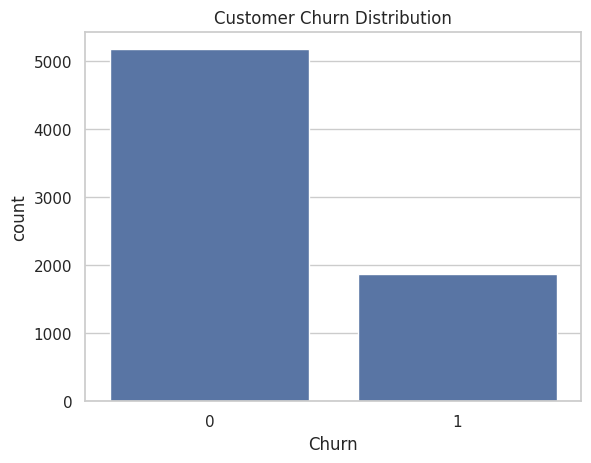

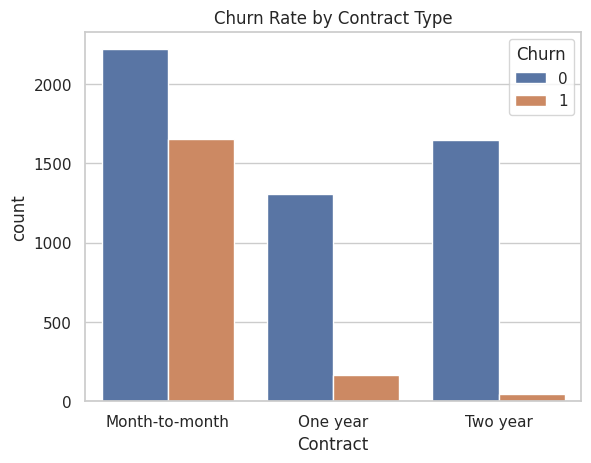

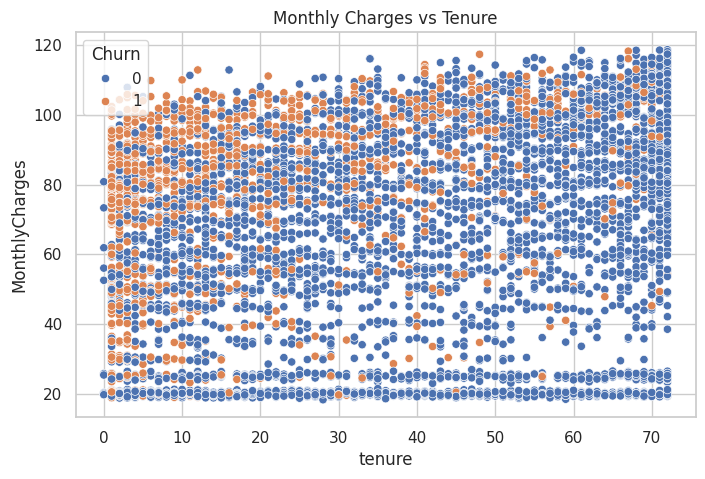

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:59:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7892122072391767

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



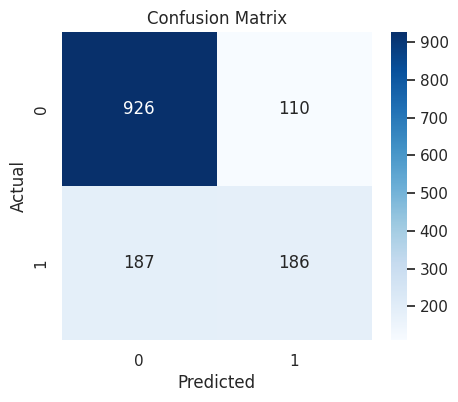

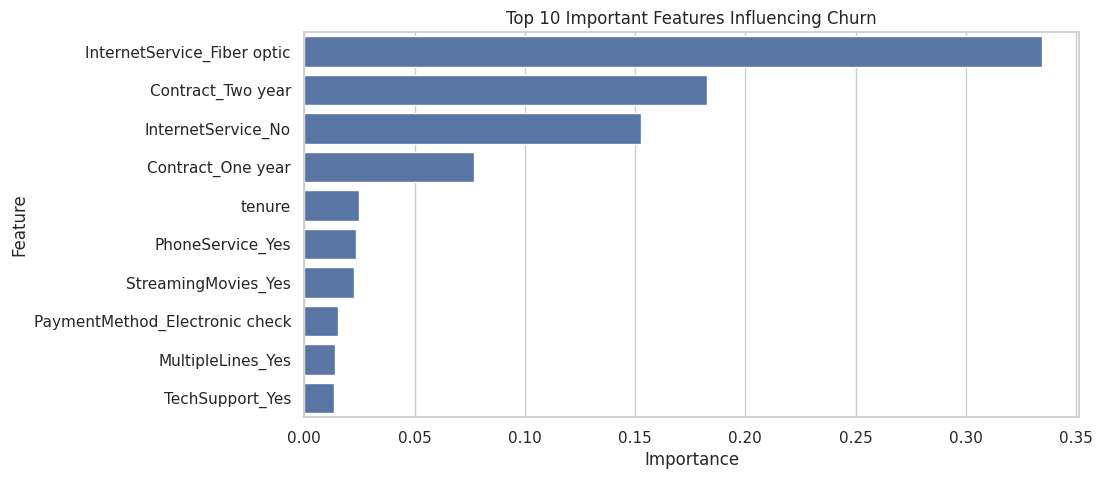

,0
InternetService_Fiber optic,0.334715
Contract_Two year,0.182862
InternetService_No,0.152917
Contract_One year,0.076980
tenure,0.025021
PhoneService_Yes,0.023437
StreamingMovies_Yes,0.022337
PaymentMethod_Electronic check,0.015277
MultipleLines_Yes,0.013774
TechSupport_Yes,0.013629


In [ ]:
# Data and math
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.to_csv("Telco_Cleaned.csv", index=False)
from google.colab import files
files.download("Telco_Cleaned.csv")

# Quick look
df.head()
df.info()
df.describe()
df.isnull().sum()
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)

df.head()
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

# Monthly Charges vs Tenure
plt.figure(figsize=(8,5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Tenure')
plt.show()
# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Top 10 Important Features Influencing Churn")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

feat_imp
